In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression as sk_lr
from sklearn.linear_model import LogisticRegression as sk_log_r
import gc
np.random.seed(42)

### 1) Linear Regression

##### 1.1 Creating custom dataset for testing model

In [ ]:
from sklearn.datasets import make_regression
X, y, coef = make_regression(n_samples=1000,
                             n_features=2,
                             n_informative=2,
                             noise=10.0,
                             bias=1.0,
                             coef=True,
                             random_state=42)

In [ ]:
df = pd.DataFrame(
           data={'feature1':X[:,0],
                 'feature2':X[:,1],
                 'target (y)':y, 
                 'weight1':coef[0],
                 'weight2':coef[1], 
                 'bias':1 , 
                 'y_hat': ((coef[0]*X[:,0])+(coef[1]*X[:,1]))+1 })
df.head()

,feature1,feature2,target (y),weight1,weight2,bias,y_hat
0,-0.167118,0.146714,-13.996950,40.710649,6.600984,1,-4.835031
1,-0.020902,0.117327,-11.678089,40.710649,6.600984,1,0.923559
2,0.150419,0.364961,18.775455,40.710649,6.600984,1,9.532753
3,0.555604,0.089581,7.661465,40.710649,6.600984,1,24.210339
4,0.058209,-1.142970,-13.195530,40.710649,6.600984,1,-4.175014


In [ ]:
X=df.drop(columns=['target (y)','weight1','weight2','bias','y_hat'],index=None)
Y=df['target (y)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

##### 1.2 Training the custom made model with the dataset

In [ ]:
#Import our custom model
from my_lib.LinearRegression_LinAlg import LinearRegression as custom_lr
# from my_lib.LinearRegression_GradDesc import LinearRegression as custom_lr

In [ ]:
custom_model=custom_lr()
custom_model.train(X_train,Y_train)
print("Model Trained")
print("Custom model weights=", custom_model.coefficient)
print("Custom model bias=:", custom_model.bias)

Model Trained
Custom model weights= [41.39506319  6.6740871 ]
Custom model bias=: 1.1125160830930998


In [ ]:
Y_pred = custom_model.predict(X_test)
accuracy = r2_score(Y_test, Y_pred)
accuracy

0.9362992668663301

##### 1.3 Custom model VS sci-kit learn's regression 

In [ ]:
model=sk_lr()
model.fit(X_train,Y_train)
print("Model Trained")
print("Sklearn weights=", model.coef_)
print("Sklearn bias=:", model.intercept_)

Model Trained
Sklearn weights= [41.39506319  6.6740871 ]
Sklearn bias=: 1.1125160830930987


In [ ]:
Y_pred = model.predict(X_test)
accuracy = r2_score(Y_test, Y_pred)
accuracy

0.9362992668663301

In [ ]:
del X, y, coef, df, X_train, X_test, Y_train, Y_test, Y_pred, accuracy
gc.collect();

### 2) Logistic Regression

##### 2.1 Creating custom dataset for testing model

In [ ]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000,
                           n_features=5,
                           n_informative=2,
                           n_redundant=1,
                           n_repeated=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.1,
                           random_state=42)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Target'] = Y
df


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,0.317453,0.768328,-0.332860,-1.218005,1.440387,1
1,1.065172,0.337779,1.452617,-0.828461,0.979448,1
2,0.466671,1.567346,1.521006,0.818854,-0.965285,0
3,1.497432,0.224761,1.857702,-1.157030,1.367534,1
4,-1.366858,1.150180,0.592567,-0.934416,1.105847,1
...,...,...,...,...,...,...
995,-1.951102,-0.125265,0.143588,-1.158613,1.368888,1
996,-0.889241,1.772590,0.955301,0.508680,-0.598465,0
997,-1.153332,1.513910,-1.687344,-1.162699,1.376134,1
998,-1.070852,1.098807,1.911419,-0.807573,0.955887,1


In [ ]:
X=df.drop(columns=['Target'],index=None)
Y=df['Target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

##### 2.2 Training our Model with the dataset

In [ ]:
#Importing our Custom Model
from my_lib.LogisticRegression import LogisticRegression as custom_log_r

In [ ]:
custom_classifier=custom_log_r()
custom_classifier.train(X_train,Y_train)
print("Model Trained")
print("Custom classifier weights=", custom_classifier.coefficient)
print("Custom classifier bias=:", custom_classifier.bias)

Model Trained
Custom classifier weights= [ 0.0382751  -0.01048686 -0.08953879 -0.90262316  1.06656721]
Custom classifier bias=: 0.05553653328267255


In [ ]:
Y_pred = custom_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.825

##### 2.3 Custom Model vs SkLearn Classifier

In [ ]:
classifier=sk_log_r()
classifier.fit(X_train,Y_train)
print("Model Trained")
print("Sklearn Classifier weights=", classifier.coef_)
print("Sklearn Classifier bias=:", classifier.intercept_)

Model Trained
Sklearn Classifier weights= [[ 0.07504523 -0.22494571 -0.13279759 -1.1255616   1.32968553]]
Sklearn Classifier bias=: [0.51550855]


In [ ]:
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.835

In [ ]:
del X, Y, df, X_train, X_test, Y_train, Y_test, Y_pred, accuracy
gc.collect();

### 3) Encoders

##### 3.1 One Hot Encoder

In [30]:
import pandas as pd
from my_lib.Encoders import OneHotEncoder
onehotencoder=OneHotEncoder()

In [31]:
df=pd.read_csv("sample_data.csv")
df

,Age,Gender,Dept,Education,Type
0,26,Male,Police,Bachelor's,Cadre
1,31,Male,Tax,Pass,Non-Cadre
2,24,Female,Admin,Master's,Cadre
3,34,Male,Tax,Pass,Cadre
4,27,Male,Admin,Bachelor's,Cadre
5,28,Female,Admin,Bachelor's,Cadre
6,25,Female,Tax,Master's,Cadre
7,30,Male,Police,Pass,Non-Cadre
8,29,Female,Admin,Pass,Non-Cadre
9,33,Male,Tax,Bachelor's,Non-Cadre


In [32]:
df=onehotencoder.transform(df,['Gender','Dept'],drop_first=True)
df

,Age,Education,Type,Gender_Female,Dept_Tax,Dept_Admin
0,26,Bachelor's,Cadre,0,0,0
1,31,Pass,Non-Cadre,0,1,0
2,24,Master's,Cadre,1,0,1
3,34,Pass,Cadre,0,1,0
4,27,Bachelor's,Cadre,0,0,1
5,28,Bachelor's,Cadre,1,0,1
6,25,Master's,Cadre,1,1,0
7,30,Pass,Non-Cadre,0,0,0
8,29,Pass,Non-Cadre,1,0,1
9,33,Bachelor's,Non-Cadre,0,1,0


In [33]:
onehotencoder.feature_names

{'Gender': array(['Male', 'Female'], dtype=object),
 'Dept': array(['Police', 'Tax', 'Admin'], dtype=object)}

##### 3.2 Ordinal Encoder

In [34]:
from my_lib.Encoders import OrdinalEncoder
ordinalencoder = OrdinalEncoder()

Here, the order of 'Education' matters, so a parameter named category is passed where the order of variables is mentioned

In [35]:
features=['Education','Type']
categories=[["Pass","Bachelor's","Master's"],None]
df=ordinalencoder.transform(df,['Education','Type'],category=categories)
df

,Age,Education,Type,Gender_Female,Dept_Tax,Dept_Admin
0,26,1,0,0,0,0
1,31,0,1,0,1,0
2,24,2,0,1,0,1
3,34,0,0,0,1,0
4,27,1,0,0,0,1
5,28,1,0,1,0,1
6,25,2,0,1,1,0
7,30,0,1,0,0,0
8,29,0,1,1,0,1
9,33,1,1,0,1,0


In [36]:
ordinalencoder.feature_maps

[{'Pass': 0, "Bachelor's": 1, "Master's": 2}, {'Cadre': 0, 'Non-Cadre': 1}]

In [37]:
del df,features,categories,onehotencoder
gc.collect();

 ### 4) Feature Scaling

In [38]:
from my_lib.FeatureScaling import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer

In [39]:
df = pd.DataFrame({
    'A': np.random.normal(0, 1, 1000),
    'B': np.random.exponential(1, 1000),
    'C': np.random.uniform(0, 10, 1000),
    'D': np.random.randint(0, 100, 1000)
})
df

,A,B,C,D
0,-0.182418,0.937033,8.031705,99
1,0.031076,0.588019,1.534129,26
2,-0.676671,1.356231,3.665512,74
3,1.004593,0.259200,3.733532,68
4,0.096828,0.060236,1.514104,56
...,...,...,...,...
995,-0.186886,0.686202,4.563168,94
996,-0.676241,0.131612,1.707683,3
997,-1.094365,0.512444,2.672099,37
998,-0.588154,0.431875,5.091134,62


In [40]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()
robust_scaler = RobustScaler()
normalizer = Normalizer()

In [41]:
scaled_df=pd.DataFrame(index=df.index)
scaled_df['A_scaled'] = standard_scaler.fit_transform(df[['A']])
scaled_df['B_scaled'] = minmax_scaler.fit_transform(df[['B']])
scaled_df['C_scaled'] = maxabs_scaler.fit_transform(df[['C']])
scaled_df['D_scaled'] = robust_scaler.fit_transform(df[['D']])
scaled_df

,A_scaled,B_scaled,C_scaled,D_scaled
0,-0.199944,0.124062,0.803808,0.958333
1,0.017335,0.077659,0.153535,-0.562500
2,-0.702961,0.179797,0.366842,0.437500
3,1.008114,0.033940,0.373649,0.312500
4,0.084253,0.007487,0.151531,0.062500
...,...,...,...,...
995,-0.204491,0.090713,0.456679,0.854167
996,-0.702524,0.016977,0.170904,-1.041667
997,-1.128061,0.067611,0.267422,-0.333333
998,-0.612875,0.056899,0.509517,0.187500


In [42]:
norm_rows=normalizer.transform(df)
normalized_df = pd.DataFrame(norm_rows, columns=df.columns+'_normalized')
normalized_df

,A_normalized,B_normalized,C_normalized,D_normalized
0,-0.001836,0.009434,0.080859,0.996679
1,0.001193,0.022571,0.058887,0.998009
2,-0.009131,0.018301,0.049463,0.998567
3,0.014749,0.003806,0.054816,0.998380
4,0.001728,0.001075,0.027028,0.999633
...,...,...,...,...
995,-0.001986,0.007291,0.048486,0.998795
996,-0.192111,0.037389,0.485129,0.852259
997,-0.029485,0.013807,0.071993,0.996874
998,-0.009454,0.006942,0.081834,0.996577


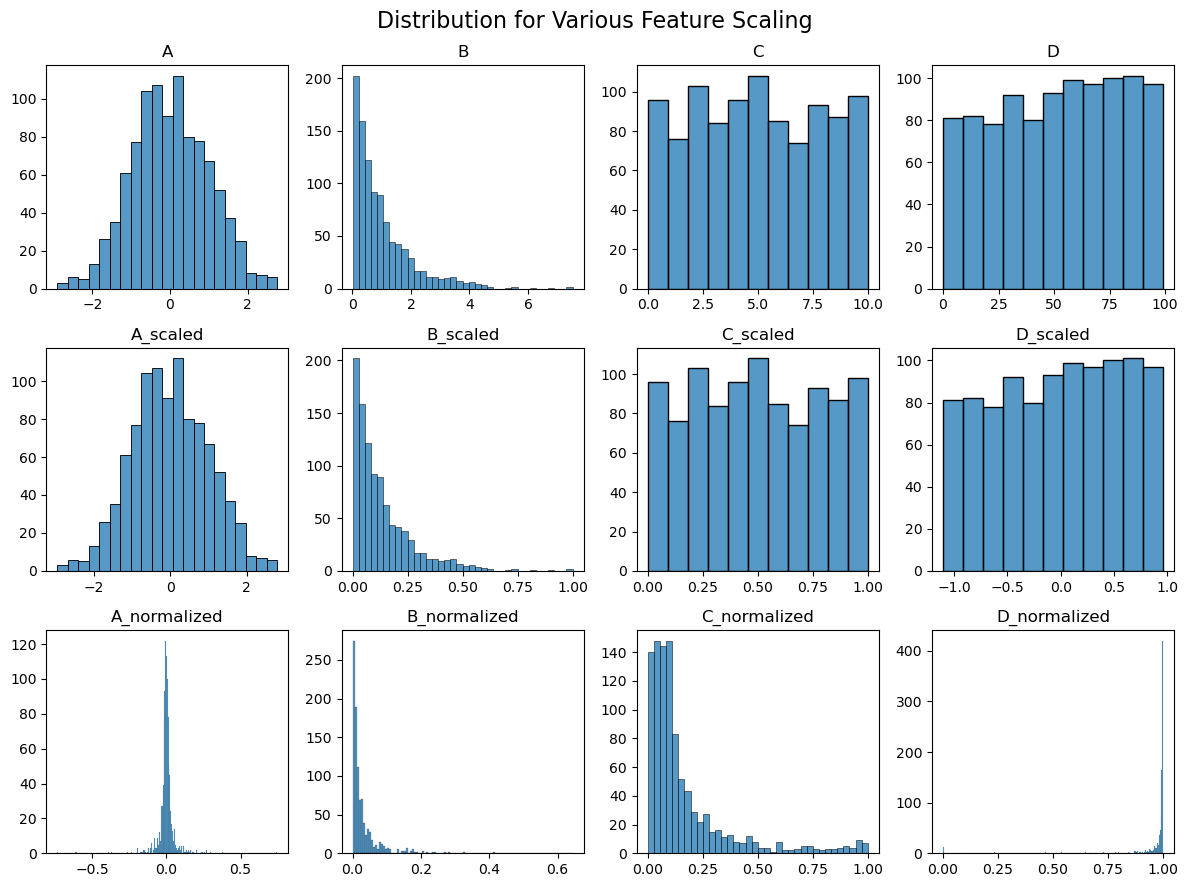

In [43]:
plt.subplots(figsize=(12, 9))
cols=df.columns.tolist() + scaled_df.columns.tolist() + normalized_df.columns.tolist()
for i, col in enumerate(cols):
    plt.subplot(3, 4, i+1)
    if i<=3:
        sns.histplot(df[col])
    elif i<=7:
        sns.histplot(scaled_df[col])
    else:
        sns.histplot(normalized_df[col])
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel('')  # Remove y-axis label
    plt.title(col)
plt.suptitle('Distribution for Various Feature Scaling', fontsize=16)
plt.tight_layout()

In [44]:
del df,scaled_df,normalized_df,standard_scaler,minmax_scaler,maxabs_scaler,robust_scaler,normalizer
gc.collect();

 ### 5) Decision Tree Classifier

In [45]:
from pprint import pprint
from my_lib.DecisionTree import Decision_Tree_Classifier
classifier=Decision_Tree_Classifier()

In [46]:
df=pd.read_csv('mushroom_data.csv')
df

,Cap Color,Stalk Shape,Solitary,Edible
0,Brown,Tapering,Yes,1
1,Brown,Enlarging,Yes,1
2,Brown,Enlarging,No,0
3,Brown,Enlarging,No,0
4,Brown,Tapering,Yes,1
5,Red,Tapering,Yes,0
6,Red,Enlarging,No,0
7,Brown,Enlarging,Yes,1
8,Red,Tapering,No,1
9,Brown,Enlarging,No,0


In [47]:
y=np.array(df.Edible)
x=df.drop("Edible", axis=1)

In [48]:
features=['Cap Color','Stalk Shape','Solitary']
x=ordinalencoder.transform(x,features)
x=np.array(x)

In [49]:
tree=classifier.build_tree(x,y)
pprint(tree,width=1)

{2: {'left': {0: {'left': 0,
                  'right': 1}},
     'right': {1: {'left': 1,
                   'right': 0}}}}


In [50]:
del df,x,y,features,classifier
gc.collect();

 ### 6) K-Nearest Neighbour

In [68]:
from my_lib.KNearestNeighbour import KNN
clusterer=KNN()

In [69]:
df=pd.read_csv('knn_test_dataset_4_clusters.csv')
X=df.drop('Cluster',axis=1).to_numpy()

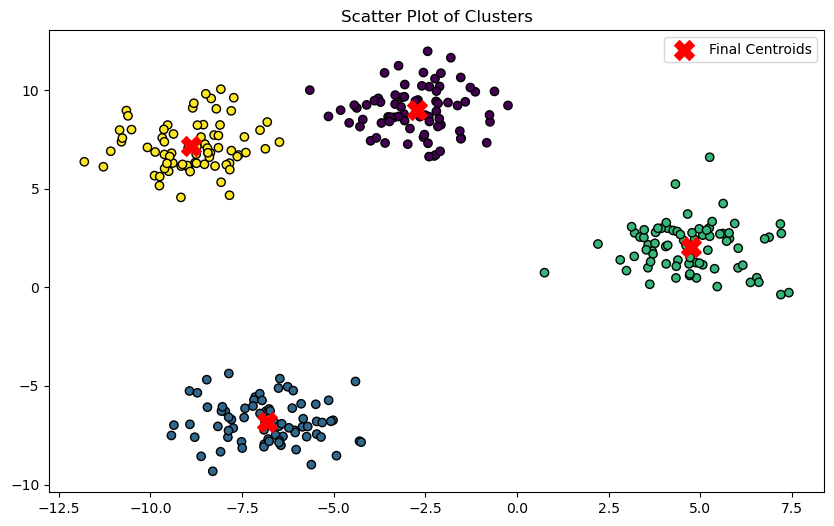

In [70]:
max_iters, k = 20, 4
clusterer.fit_knn(X,k,max_iters,plot=True)

In [71]:
clusterer.centroids

array([[-2.7332785 ,  8.96731218],
       [-6.82289702, -6.82052706],
       [ 4.73387011,  2.05552217],
       [-8.88062107,  7.14479553]])

In [72]:
del df,X,k,max_iters,clusterer
gc.collect();